In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, entropy
from skimage.feature import graycomatrix, graycoprops
import seaborn as sns
import pandas as pd

In [3]:
image = cv2.imread(
    "/media/williancaddd/CODES/projects/malaria-pibiti/grad-cam/images-grad-test/5-3-28-1.bmp"
)
image_gay = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

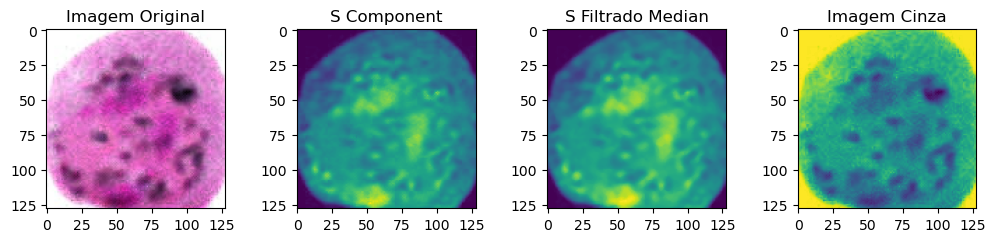

In [4]:
# processamento de imagem
image_contrast = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)

# Conversão para o espaço de cor HSV
image_hsv = cv2.cvtColor(image_contrast, cv2.COLOR_BGR2HSV)

# Extração do componente S
s_component = image_hsv[:, :, 1]


# Aplicação de filtro test
s_filtered_median = cv2.medianBlur(s_component, 3)

# plot all the images and their histograms
images = [image, s_component, s_filtered_median, image_gay]
titles = ["Imagem Original", "S Component", "S Filtrado Median", "Imagem Cinza"]
plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace=0.4)  # Ajuste esse valor conforme necessário


for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    
    # Define os ticks para os eixos x e y conforme as dimensões da imagem
    plt.xticks(range(0, images[i].shape[1], max(1, images[i].shape[1] // 5)))
    plt.yticks(range(0, images[i].shape[0], max(1, images[i].shape[0] // 5)))
#download the plot
plt.savefig("plot.png", dpi=500, bbox_inches="tight", pad_inches=0.1)
plt.show()




Text(0.5, 1.0, 'FM')

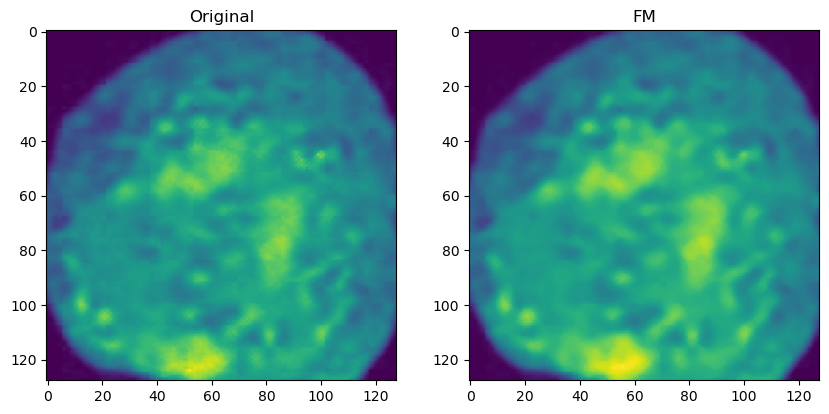

In [5]:
# Exibição da imagem processada
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(s_component)
plt.title("Original")

plt.subplot(2, 2, 2)
plt.imshow(s_filtered_median)
plt.title("FM")


Text(0.5, 1.0, 'S Component Filtered')

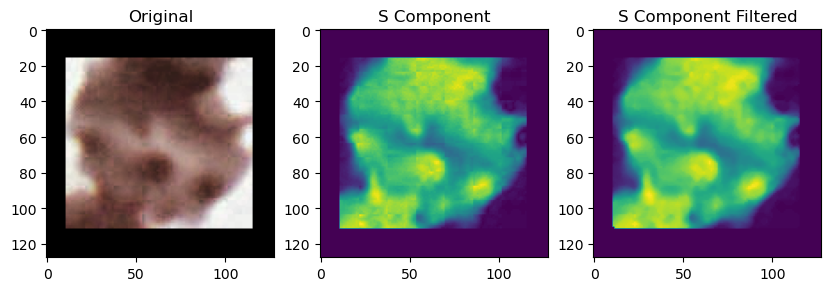

In [28]:
# show image original, s_component and s_filtered_median
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)

plt.imshow(image)
plt.title("Original")

plt.subplot(1, 3, 2)
plt.imshow(s_component)
plt.title("S Component")

plt.subplot(1, 3, 3)
plt.imshow(s_filtered_median)
plt.title("S Component Filtered")

In [29]:
def histogram_features(image):
    # Calcula o histograma da imagem
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist = hist.ravel() / hist.sum()

    # Calcula as características
    mean = np.mean(hist)
    std_dev = np.std(hist)
    energy = np.sum(hist**2)
    skewness = skew(hist)
    entropy_val = entropy(hist)
    smoothness = 1 - (1 / (1 + std_dev**2))
    kurt = kurtosis(hist)

    features = {
        "histogram_Mean": mean,
        "histogram_Standard Deviation": std_dev,
        "histogram_Energy": energy,
        "histogram_Skewness": skewness,
        "histogram_Entropy": entropy_val,
        "histogram_Smoothness": smoothness,
        "histogram_Kurtosis": kurt,
    }

    return features


def glcm_features(image):

    # Calcula a GLCM
    glcm = graycomatrix(image, [1], [0], 256, symmetric=True, normed=True)

    # Calcula as propriedades da GLCM
    contrast = graycoprops(glcm, "contrast")[0, 0]
    dissimilarity = graycoprops(glcm, "dissimilarity")[0, 0]
    homogeneity = graycoprops(glcm, "homogeneity")[0, 0]
    energy = graycoprops(glcm, "energy")[0, 0]
    correlation = graycoprops(glcm, "correlation")[0, 0]

    features = {
        "glcm_Contrast": contrast,
        "glcm_Dissimilarity": dissimilarity,
        "glcm_Homogeneity": homogeneity,
        "glcm_Energy": energy,
        "glcm_Correlation": correlation,
    }

    return features

In [30]:
features = histogram_features(s_filtered_median)
print("Características Histograma:")
for key, value in features.items():
    print(f"{key}: {value}")


glcm_extracted = glcm_features(image_gay)

print("GLCM Features:")
for key, value in glcm_extracted.items():
    print(f"{key}: {value}")

Características Histograma:
histogram_Mean: 0.00390625
histogram_Standard Deviation: 0.02449200674891472
histogram_Energy: 0.1574699878692627
histogram_Skewness: 15.501442644439855
histogram_Entropy: 3.51566402037323
histogram_Smoothness: 0.000599498780213148
histogram_Kurtosis: 242.41497086063507
GLCM Features:
glcm_Contrast: 605.3430118110236
glcm_Dissimilarity: 5.559424212598427
glcm_Homogeneity: 0.5398811988879053
glcm_Energy: 0.37439829316233664
glcm_Correlation: 0.9455445753573567


In [31]:
def process_image(image_path):
    # Carrega a imagem
    image = cv2.imread(image_path)

    # Conversão para escala de cinza
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Processamento de imagem
    image_contrast = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)

    # Conversão para o espaço de cor HSV
    image_hsv = cv2.cvtColor(image_contrast, cv2.COLOR_BGR2HSV)

    # Extração do componente S
    s_component = image_hsv[:, :, 1]

    # Aplicação de filtro mediano
    s_filtered_median = cv2.medianBlur(s_component, 3)

    return s_filtered_median, image_gray

# receive path image and return features with histogram and glcm
def extract_all_features(image_path):
    # Processa a imagem
    image, image_gray = process_image(image_path)
  
    # Calcula as características do histograma
    hist_features = histogram_features(image)

    # Calcula as características da GLCM
    glcm_features_extracted = glcm_features(image_gray)

    # Combina as características
    features = {**hist_features, **glcm_features_extracted}

    return features


# teste
image_path = "/media/williancaddd/CODES/projects/malaria-pibiti/1_entrada/Dataset01_95.0/images/1-52-7-0.bmp"
features = extract_all_features(image_path)
print("Features:")
for key, value in features.items():
    print(f"{key}: {value}")

Features:
histogram_Mean: 0.00390625
histogram_Standard Deviation: 0.02449200674891472
histogram_Energy: 0.1574699878692627
histogram_Skewness: 15.501442644439855
histogram_Entropy: 3.51566402037323
histogram_Smoothness: 0.000599498780213148
histogram_Kurtosis: 242.41497086063507
glcm_Contrast: 605.3430118110236
glcm_Dissimilarity: 5.559424212598427
glcm_Homogeneity: 0.5398811988879053
glcm_Energy: 0.37439829316233664
glcm_Correlation: 0.9455445753573567


In [32]:

data_set_names = ['Dataset01_75.0']

path_dataset = "/media/williancaddd/CODES/projects/malaria-pibiti/1_entrada/"

"""FOR EACH IN DATASET IN image folder has all images .bmp, extract feature and save in csv file in folder features in each dataset"",
 make folder if not existis """
# show the percentage of the process
# make one csv file for each dataset with each line a image with features

import os
for dataset in data_set_names:
    print(f"Processing dataset: {dataset}")
    path = os.path.join(path_dataset, dataset)
    features_path = os.path.join(path, "features")
    if not os.path.exists(features_path):
        os.makedirs(features_path)
    images_path = os.path.join(path, "images")
    images = os.listdir(images_path)
    features = []
    for image in images:
        image_path = os.path.join(images_path, image)
        features_image = extract_all_features(image_path)
        features_image["image"] = image
        features.append(features_image)
    df = pd.DataFrame(features)
    df.to_csv(os.path.join(features_path, "features.csv"), index=False)
    print(f"Dataset {dataset} processed and features saved in {features_path}")



Processing dataset: Dataset01_75.0
Dataset Dataset01_75.0 processed and features saved in /media/williancaddd/CODES/projects/malaria-pibiti/1_entrada/Dataset01_75.0/features


In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Lista de datasets que vai de 100 até 5 com intervalos de 5
data_set_names = [f'Dataset01_{i}.0' for i in range(100, 0, -5)]
path_dataset = "/media/williancarddd/NVME/projects/malaria-pibiti/1_entrada/"

# Carregar todas as características em um único DataFrame
all_data = []

for dataset in data_set_names:
    # Caminho para o arquivo de características
    features_path = os.path.join(path_dataset, dataset, "features", "features.csv")
    
    # Carregar o arquivo CSV
    if os.path.exists(features_path):
        df = pd.read_csv(features_path)
        df['dataset'] = dataset  # Adicionar uma coluna com o nome do dataset
        df.drop('image', axis=1, inplace=True)  # Remover a coluna 'image'
        all_data.append(df)

# Concatenar todos os dados em um DataFrame
df_all = pd.concat(all_data, ignore_index=True)

# Selecionar apenas algumas colunas de interesse (exemplo: características de histograma e GLCM)
features_columns = [col for col in df_all.columns if 'histogram' in col ]

# Adicionar a coluna 'dataset' para fazer o pairplot
df_features = df_all[features_columns + ['dataset']]

df_all_sampled = df_all.groupby('dataset').sample(frac=0.01, random_state=42) # Amostragem de 1% dos dados

# Remover todas as colunas que contêm 'Mean'
df_all_sampled = df_all_sampled.drop(columns=[col for col in df_all_sampled.columns if 'Mean' in col])

# Plotar o pairplot com ajuste de tamanho para simular 3 colunas
g = sns.pairplot(df_all_sampled, hue='dataset', palette='viridis', aspect=1, height=3)
plt.savefig("pairplot.png", dpi=500, bbox_inches="tight", pad_inches=0.1)
plt.show()


ValueError: No objects to concatenate

In [ ]:
import os

# Carregar os nomes dos datasets
data_set_names = [  'Dataset01_100', 'Dataset01_95.0',  'Dataset01_90.0',  'Dataset01_85.0' , 'Dataset01_80.0',
                                 'Dataset01_75.0',  'Dataset01_70.0',  'Dataset01_65.0',  'Dataset01_60.0',  'Dataset01_55.0',
                                  'Dataset01_50.0',  'Dataset01_45.0',  'Dataset01_40.0','Dataset01_35.0',  'Dataset01_30.0',
                                   'Dataset01_25.0',  'Dataset01_20.0',  'Dataset01_15.0',  'Dataset01_10.0',  'Dataset01_5.0']
path_dataset = "/media/williancarddd/NVME/projects/malaria-pibiti/1_entrada/"


# Para armazenar os dados agregados por ROI
agg_data = []

# Iterar sobre os datasets e calcular a média/desvio-padrão das características
for dataset in data_set_names:
    features_path = os.path.join(path_dataset, dataset, "features", "features.csv")
    df = pd.read_csv(features_path)

    df.drop("image", axis=1, inplace=True)
    
    means = df.mean().to_dict()
    stds = df.std().to_dict()
    means['ROI'] = dataset
    stds['ROI'] = dataset
    agg_data.append({'mean': means, 'std': stds})

# Transformar os dados agregados em DataFrames
df_means = pd.DataFrame([x['mean'] for x in agg_data])
df_stds = pd.DataFrame([x['std'] for x in agg_data])

# Gráficos de evolução das médias
plt.figure(figsize=(12, 8))
for col in hist_features + glcm_features:
    plt.plot(df_means['ROI'], df_means[col], label=col)
plt.xticks(rotation=45)
plt.title("Evolução da Média das Características por Tamanho de ROI")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Gráficos de evolução do desvio-padrão
plt.figure(figsize=(12, 8))
for col in hist_features + glcm_features:
    plt.plot(df_stds['ROI'], df_stds[col], label=col)
plt.xticks(rotation=45)
plt.title("Evolução do Desvio-Padrão das Características por Tamanho de ROI")
plt.legend(loc='best')
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/media/williancarddd/NVME/projects/malaria-pibiti/1_entrada/Dataset01_100/features/features.csv'